In [62]:
#importing files required
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# % matplotlib inline

In [63]:
#Loading dataset to data
data = pd.read_csv('wine.csv')

In [64]:
#displaying first 5 instances
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,fixed_acidity residual_sugar,fixed_acidity chlorides,fixed_acidity free_sulfur_dioxide,fixed_acidity total_sulfur_dioxide,fixed_acidity density,fixed_acidity pH,fixed_acidity sulphates,fixed_acidity alcohol,fixed_acidity quality,volatile_acidity^2
0,6.7,0.21,0.48,14.8,0.050,31.0,195.0,0.99942,2.95,0.75,...,99.16,0.3350,207.7,1306.5,6.696114,19.765,5.025,58.96,40.2,0.0441
1,7.5,0.23,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,...,133.50,0.4350,960.0,1590.0,7.518075,25.800,3.225,66.75,37.5,NaN
2,7.3,0.24,0.43,2,0.021,20.0,69.0,0.99000,3.08,0.56,...,14.60,0.1533,146.0,503.7,7.227000,22.484,4.088,89.06,43.8,0.0576
3,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,...,7.80,0.2160,252.0,708.0,5.941080,18.240,3.840,70.50,36.0,0.0576
4,9.0,0.24,0.50,s,0.048,26.0,NaN,0.99180,3.21,0.34,...,10.80,0.4320,234.0,963.0,8.926200,28.890,3.060,111.60,54.0,0.0576


In [65]:
#checking the null values
data.isnull().sum()

fixed_acidity                         0
volatile_acidity                      0
citric_acid                           0
residual_sugar                        0
chlorides                             0
free_sulfur_dioxide                   0
total_sulfur_dioxide                  1
density                               0
pH                                    0
sulphates                             0
alcohol                               0
quality                               0
color                                 0
fixed_acidity^2                       0
fixed_acidity volatile_acidity        0
fixed_acidity citric_acid             0
fixed_acidity residual_sugar          0
fixed_acidity chlorides               0
fixed_acidity free_sulfur_dioxide     0
fixed_acidity total_sulfur_dioxide    0
fixed_acidity density                 0
fixed_acidity pH                      0
fixed_acidity sulphates               0
fixed_acidity alcohol                 0
fixed_acidity quality                 0


In [66]:
data = data.dropna()

In [67]:
target = data["color"]

In [68]:
#displays no.of rows and columns
data.shape

(21272, 26)

In [69]:
# displays statastical information
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,...,fixed_acidity residual_sugar,fixed_acidity chlorides,fixed_acidity free_sulfur_dioxide,fixed_acidity total_sulfur_dioxide,fixed_acidity density,fixed_acidity pH,fixed_acidity sulphates,fixed_acidity alcohol,fixed_acidity quality,volatile_acidity^2
count,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,...,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000,21272.000000
mean,7.215212,0.344162,0.318476,0.056692,30.029287,114.096700,0.994535,3.224652,0.533365,10.549225,...,35.800286,0.423099,210.053761,798.708876,7.177654,23.209143,3.908561,75.954088,41.724022,0.146757
std,1.319581,0.168258,0.147164,0.036867,17.790412,56.765646,0.002965,0.160382,0.149727,1.185872,...,31.886273,0.325165,121.377648,400.257131,1.325322,4.049994,1.600714,15.642238,9.626660,0.164822
min,3.800000,0.080000,0.000000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,...,3.570000,0.045000,7.900000,42.300000,3.771424,13.923000,1.344000,33.600000,12.600000,0.006400
25%,6.400000,0.230000,0.240000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,...,12.600000,0.252000,117.000000,518.400000,6.361856,20.591000,2.898000,65.100000,35.500000,0.052900
50%,7.000000,0.300000,0.310000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,...,22.200000,0.324000,195.000000,790.000000,6.933325,22.400000,3.536000,73.260000,40.200000,0.090000
75%,7.700000,0.410000,0.400000,0.066000,41.000000,153.000000,0.996770,3.330000,0.600000,11.400000,...,51.590000,0.483000,283.500000,1073.700000,7.672665,24.825000,4.399000,83.160000,46.200000,0.168100
max,15.900000,1.580000,1.660000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,...,513.240000,5.612000,1762.900000,3151.900000,15.861840,47.382000,18.400000,236.910000,109.200000,2.496400


In [70]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'fixed_acidity^2',
       'fixed_acidity volatile_acidity', 'fixed_acidity citric_acid',
       'fixed_acidity residual_sugar', 'fixed_acidity chlorides',
       'fixed_acidity free_sulfur_dioxide',
       'fixed_acidity total_sulfur_dioxide', 'fixed_acidity density',
       'fixed_acidity pH', 'fixed_acidity sulphates', 'fixed_acidity alcohol',
       'fixed_acidity quality', 'volatile_acidity^2'],
      dtype='object')

In [71]:
# shows pairplot for the dataset
#sns.pairplot(data)


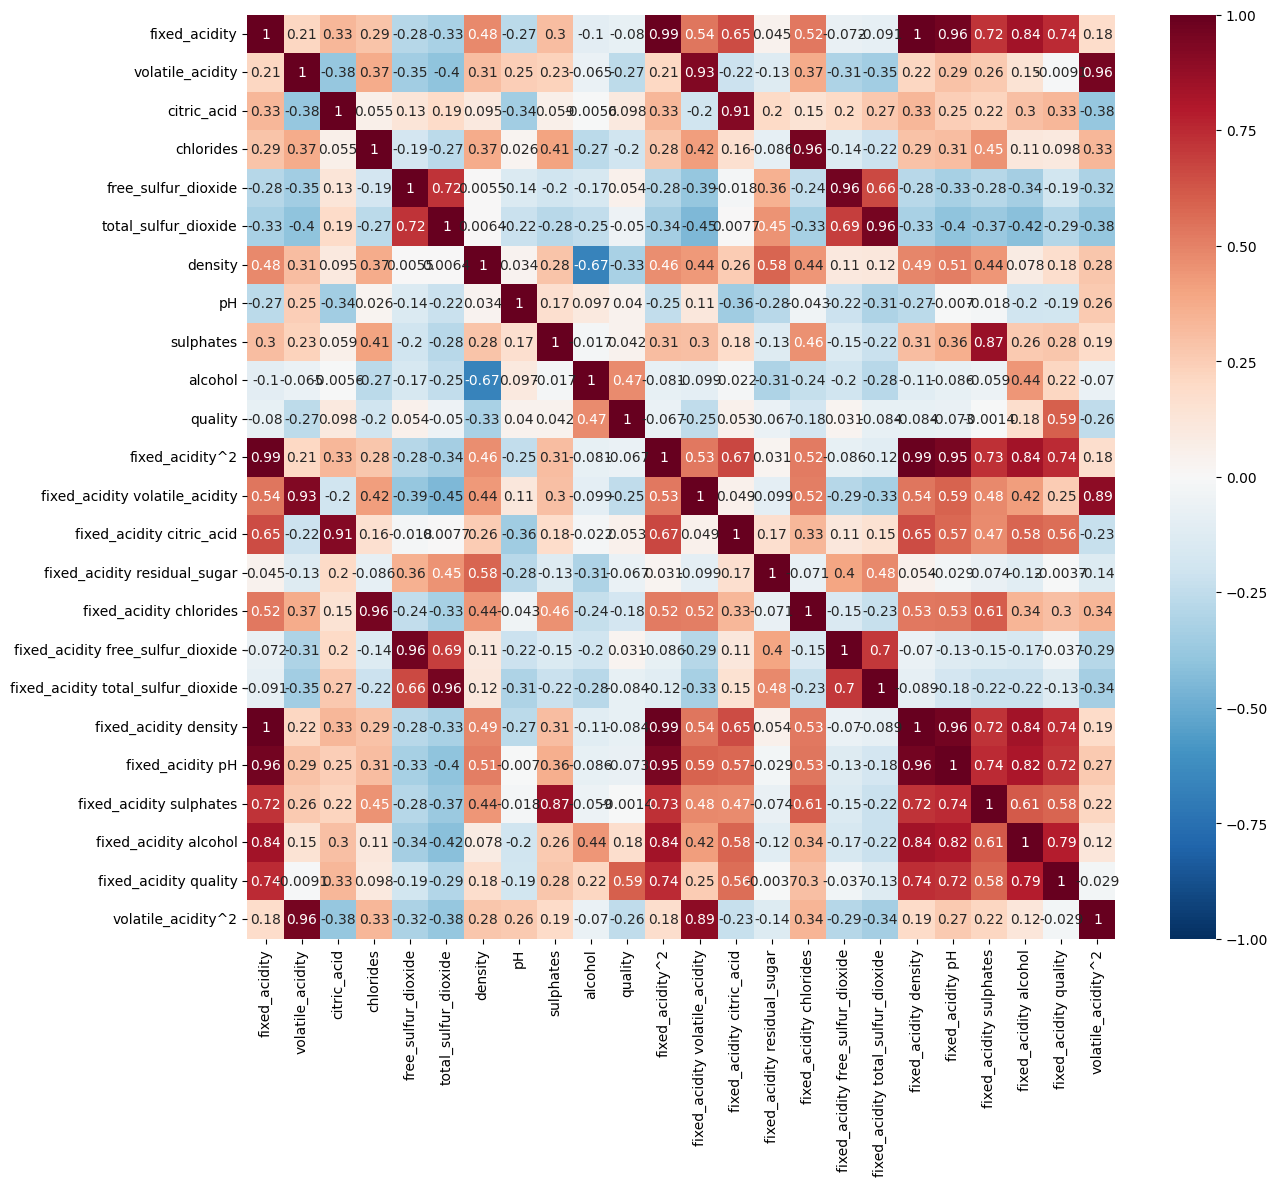

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix with the numeric_only parameter set explicitly
correlation = data.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()


In [73]:
# displays correlation data for wine dataset
data.corr(numeric_only=True)

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,...,fixed_acidity residual_sugar,fixed_acidity chlorides,fixed_acidity free_sulfur_dioxide,fixed_acidity total_sulfur_dioxide,fixed_acidity density,fixed_acidity pH,fixed_acidity sulphates,fixed_acidity alcohol,fixed_acidity quality,volatile_acidity^2
fixed_acidity,1.000000,0.214760,0.330356,0.288958,-0.281746,-0.327396,0.478319,-0.271249,0.304820,-0.102771,...,0.045180,0.524440,-0.071533,-0.090569,0.999900,0.963097,0.720456,0.842831,0.744437,0.184468
volatile_acidity,0.214760,1.000000,-0.384170,0.367631,-0.349113,-0.400720,0.308575,0.246777,0.227739,-0.065418,...,-0.131617,0.374997,-0.312244,-0.351199,0.218247,0.293061,0.260664,0.147145,-0.009141,0.960937
citric_acid,0.330356,-0.384170,1.000000,0.055184,0.131009,0.194911,0.094839,-0.344827,0.059262,-0.005576,...,0.199494,0.147759,0.200624,0.267097,0.329437,0.246475,0.221185,0.300679,0.328375,-0.383680
chlorides,0.288958,0.367631,0.055184,1.000000,-0.186705,-0.269831,0.371956,0.025814,0.405116,-0.269640,...,-0.086245,0.955663,-0.137596,-0.215814,0.292717,0.310390,0.447148,0.112541,0.098265,0.334613
free_sulfur_dioxide,-0.281746,-0.349113,0.131009,-0.186705,1.000000,0.720590,0.005457,-0.142138,-0.198169,-0.169742,...,0.358067,-0.244230,0.964067,0.663758,-0.279709,-0.330762,-0.281803,-0.337224,-0.188153,-0.319561
total_sulfur_dioxide,-0.327396,-0.400720,0.194911,-0.269831,0.720590,1.000000,0.006446,-0.223044,-0.275759,-0.248807,...,0.447275,-0.334748,0.688622,0.956415,-0.325201,-0.402329,-0.367499,-0.419639,-0.294556,-0.383239
density,0.478319,0.308575,0.094839,0.371956,0.005457,0.006446,1.000000,0.034223,0.282780,-0.667791,...,0.583389,0.443697,0.109207,0.116266,0.490366,0.511572,0.439501,0.078237,0.176232,0.279917
pH,-0.271249,0.246777,-0.344827,0.025814,-0.142138,-0.223044,0.034223,1.000000,0.168245,0.097354,...,-0.276744,-0.042957,-0.217140,-0.310985,-0.268088,-0.006987,-0.018431,-0.198487,-0.190325,0.258549
sulphates,0.304820,0.227739,0.059262,0.405116,-0.198169,-0.275759,0.282780,0.168245,1.000000,-0.017260,...,-0.132454,0.458125,-0.147945,-0.224284,0.307323,0.362954,0.866476,0.260193,0.275254,0.190265
alcohol,-0.102771,-0.065418,-0.005576,-0.269640,-0.169742,-0.248807,-0.667791,0.097354,-0.017260,1.000000,...,-0.308660,-0.239916,-0.200764,-0.278630,-0.112019,-0.085566,-0.058854,0.439347,0.218293,-0.070293


array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'quality'}>,
        <Axes: title={'center': 'fixed_acidity^2'}>,
        <Axes: title={'center': 'fixed_acidity volatile_acidity'}>,
        <Axes: title={'center': 'fixed_acidity citric_acid'}>,
        <Axes: title={'center': 'fixed_acidity residual_sugar'}>],
       [<Axes: title={'center': 'fixed_acidity chlorides'}>,
        <Axes: title={'center': 'fixed_acidity free_sulfur_dioxide'}>,
        <Axes: title={'center': 'fixed_acidity total_sulfur_dioxide'}>,
     

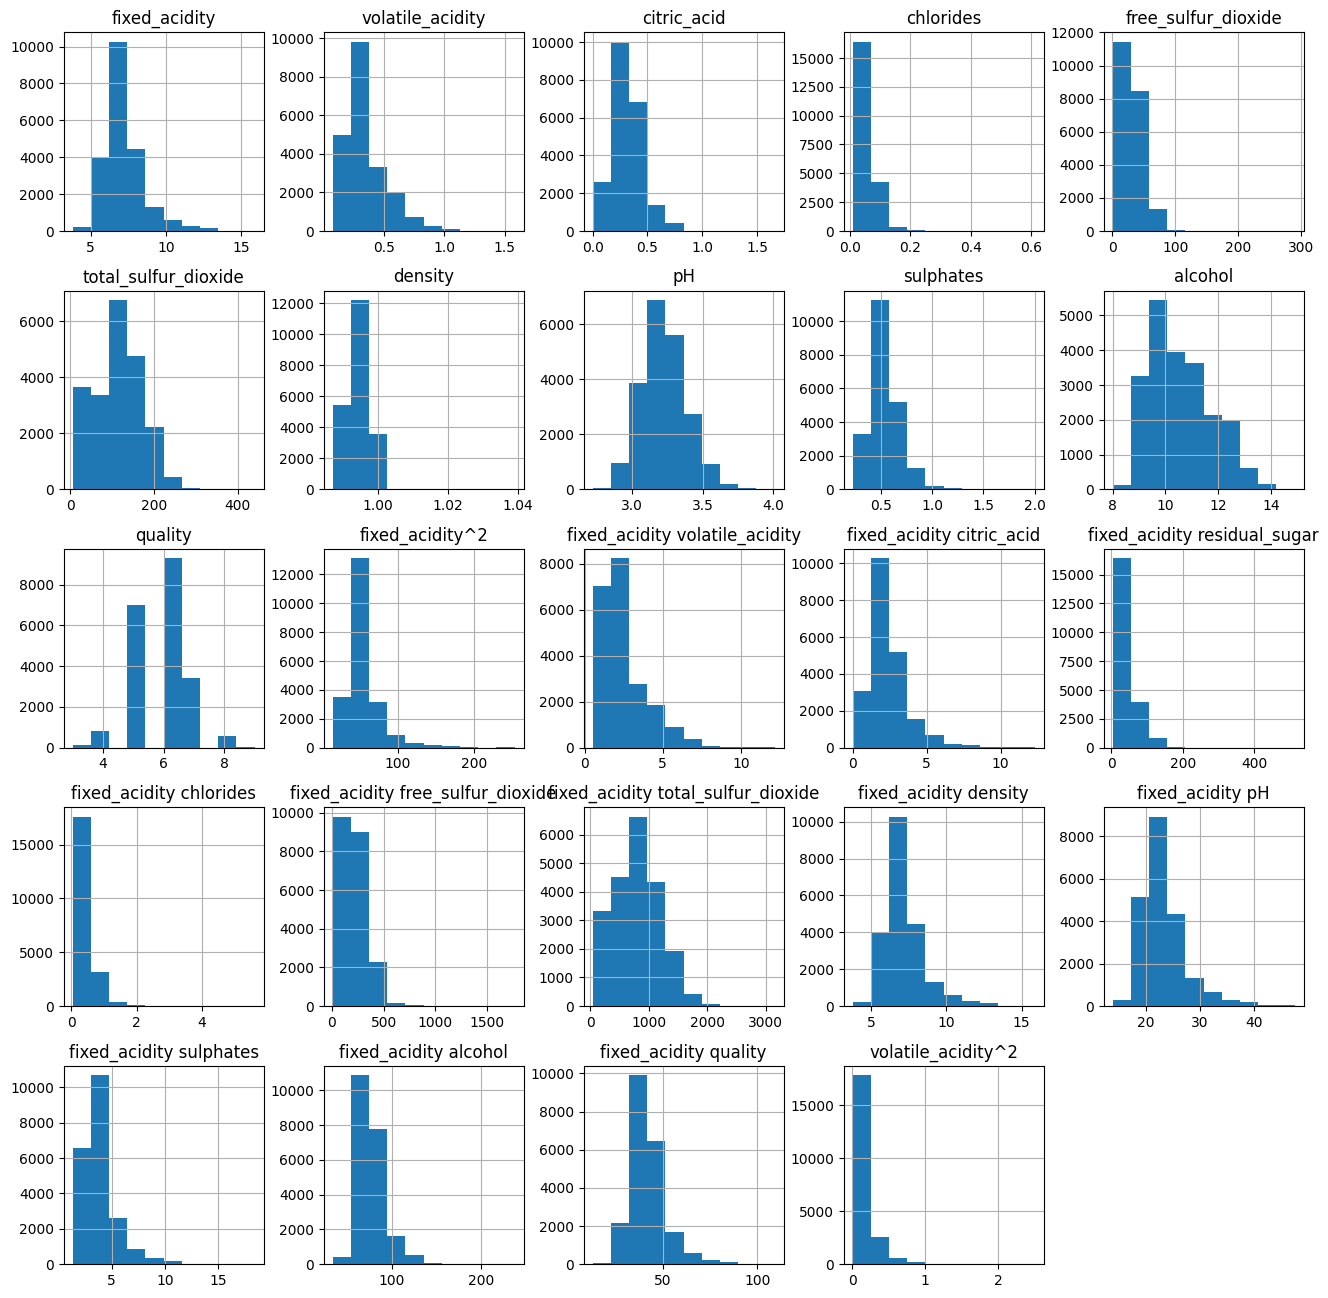

In [74]:
# draws histograms for dataset
data.hist(figsize=(16,16))

In [75]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'fixed_acidity^2',
       'fixed_acidity volatile_acidity', 'fixed_acidity citric_acid',
       'fixed_acidity residual_sugar', 'fixed_acidity chlorides',
       'fixed_acidity free_sulfur_dioxide',
       'fixed_acidity total_sulfur_dioxide', 'fixed_acidity density',
       'fixed_acidity pH', 'fixed_acidity sulphates', 'fixed_acidity alcohol',
       'fixed_acidity quality', 'volatile_acidity^2'],
      dtype='object')

In [76]:
# storing output value in target variable
# target = data["color"]

In [77]:
# dropping output values and storing to data
data = data.drop('color',axis = 1)

In [78]:
# displays first 5 lines
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,fixed_acidity residual_sugar,fixed_acidity chlorides,fixed_acidity free_sulfur_dioxide,fixed_acidity total_sulfur_dioxide,fixed_acidity density,fixed_acidity pH,fixed_acidity sulphates,fixed_acidity alcohol,fixed_acidity quality,volatile_acidity^2
0,6.7,0.210,0.48,14.8,0.050,31.0,195.0,0.99942,2.95,0.75,...,99.160,0.3350,207.7,1306.5,6.696114,19.765,5.025,58.96,40.2,0.044100
2,7.3,0.240,0.43,2,0.021,20.0,69.0,0.99000,3.08,0.56,...,14.600,0.1533,146.0,503.7,7.227000,22.484,4.088,89.06,43.8,0.057600
3,6.0,0.240,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,...,7.800,0.2160,252.0,708.0,5.941080,18.240,3.840,70.50,36.0,0.057600
5,4.8,0.225,0.38,1.2,0.074,47.0,130.0,0.99132,3.31,0.40,...,5.760,0.3552,225.6,624.0,4.758336,15.888,1.920,49.44,28.8,0.050625
6,6.3,0.230,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,...,23.625,0.2457,233.1,730.8,6.254010,20.349,3.150,67.41,37.8,0.052900


In [79]:
# maps the output terms red to 0 and white to 1
target = target.map({'red':0,'white':1})

In [80]:
# checking the red counts and white value counts
target.value_counts()

1    15837
0     5435
Name: color, dtype: int64

<Axes: >

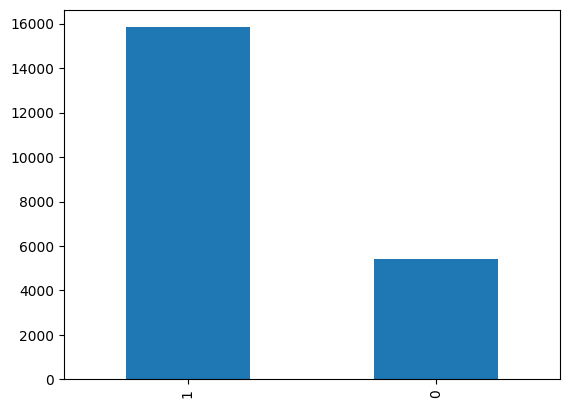

In [81]:
# plotting the no.of values of red wine and white wine by bar graphs
target.value_counts().plot.bar()

In [82]:
# checking whether the values assigned to target or not
target.head(4898)

0       1
2       1
3       1
5       1
6       1
       ..
4895    1
4896    1
4897    1
4898    1
4899    1
Name: color, Length: 4898, dtype: int64

In [83]:
# importing and splitting data to training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33, random_state=12)

In [84]:
# checking the instances and features
X_train.shape

(14252, 25)

In [85]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, fit your classifier with the imputed data
clf = KNeighborsClassifier()
clf.fit(X_train_imputed, y_train)

# Make predictions with the imputed test data
pred = clf.predict(X_test_imputed)


In [86]:
# calculating f1_score for the KNeighborsClassifier's
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.9757552434096594

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Optional: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
clf1 = LogisticRegression(max_iter=1000)  # Increase max_iter
clf1.fit(X_train_scaled, y_train)  # Use scaled data

# Make predictions
pred1 = clf1.predict(X_test_scaled)

# Calculate and print the F1 score
print(f1_score(y_test, pred1))


0.9971126082771896


Explained Variance Ratio: [0.33774679 0.20050065 0.1387255  0.06632749 0.05638466 0.05196363
 0.03866901 0.03152589 0.02883678 0.02217704]


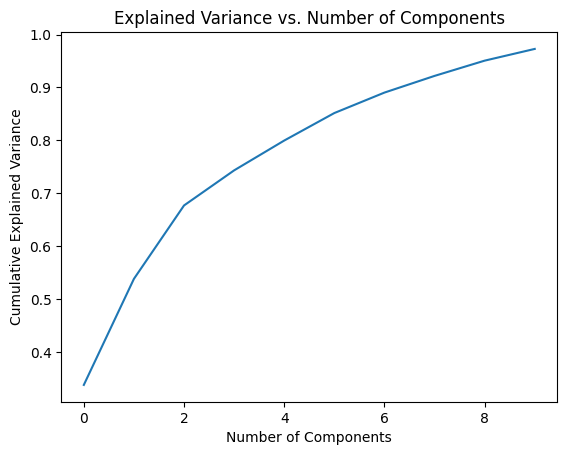

In [88]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
from sklearn.decomposition import PCA

# Choose the number of components
n_components = 10  

# Create PCA instance
pca = PCA(n_components=n_components)

# Fit and transform on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data
X_test_pca = pca.transform(X_test_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plotting cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [89]:
# applying naive_bayes GuassianNB algorithm
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train_pca, y_train)  # Use PCA-transformed data
pred2 = clf2.predict(X_test_pca)

#calculating f1_score
print(f1_score(y_test, pred2))

0.9594194595626849


In [90]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Optional: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the LinearSVC model
clf3 = LinearSVC(max_iter=10000, dual=False)  # Increase max_iter and set dual
clf3.fit(X_train_scaled, y_train)  # Use scaled data

# Make predictions
pred3 = clf3.predict(X_test_scaled)

# Calculate and print the F1 score
print(f1_score(y_test, pred3))


0.9971126082771896


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameter grid
clf_5 = LogisticRegression(max_iter=10000)  # Increase max_iter
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [1.0, 0.9, 0.5, 0.2],
    'solver': ['liblinear', 'saga']  # Add solver to the grid
}
scorer = make_scorer(f1_score)

# Grid search with the specified parameters
grid = GridSearchCV(clf_5, param_grid=parameters, scoring=scorer)
grid.fit(X_train_scaled, y_train)  # Use scaled data

# Make predictions and calculate F1 score
pred_5 = grid.predict(X_test_scaled)
print(f1_score(y_test, pred_5))


0.9971126082771896


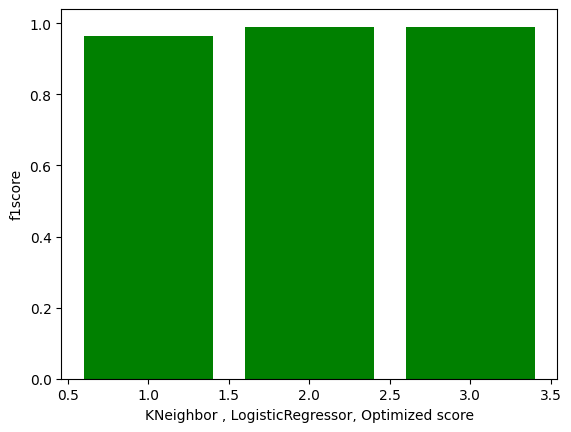

In [92]:
lab=[1,2,3]
f1score=[0.96294,0.9894,0.99031]
plt.bar(lab,f1score,color="green")
plt.xlabel("KNeighbor , LogisticRegressor, Optimized score")
plt.ylabel("f1score")
plt.show()

In [93]:
# observing the best parameters
grid.best_estimator_

LogisticRegression(max_iter=10000, solver='liblinear')

In [94]:
# cross val score is because our algorithm correctly predicts for new data
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model with a pipeline that includes scaling
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2']
}

# Create a GridSearchCV object
grid = GridSearchCV(logistic_model, param_grid, cv=10)

# Perform the grid search with cross-validation
cross_val_score(grid, data, target, cv=10, scoring=scorer)


array([0.99684741, 0.99810606, 0.99495268, 0.99747793, 0.99589776,
       0.99684343, 0.9955836 , 0.99684543, 0.99589258, 0.99715999])